# Binder selection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
bindcraft = pd.read_csv('bindcraft_passed-bindcraft_metrics.csv')

rf3 = pd.read_csv('bindcraft_passed-rf3_metrics.csv')
rf3.rename(columns={'example_id': 'Design'}, inplace=True)
rf3['Design'] = rf3['Design'].str.rsplit('_',n=1).str[0]

df = pd.merge(bindcraft, rf3, on='Design', how='outer')
df['rf3_iptm'] = df[['iptm.iptm_0','iptm.iptm_1','iptm.iptm_2','iptm.iptm_3','iptm.iptm_4']].mean(axis=1)

top_iptm_designs = df[(df['Average_i_pTM'] > 0.6) & (df['rf3_iptm'] > 0.6)].sort_values(by=['rf3_iptm'], ascending=False)

In [10]:
from promb import init_db
db = init_db('human-reference',9)


              *           █
▄▄▄▄    ▄▄▄  ▄█▄   ▄▄▄▄   █▄▄▄  
█   █  █    █▓███  █ █ █  █   █ 
█▄▄▄▀  █    ▀███▀  █   █  █▄▄▄▀ 
█                              
▀  protein mutation burden v1.0.2
                                
Loading promb database to memory...


Database (~11M peptides, <512 MB) loaded in 10s.


In [27]:
humanness_scores = []
for seq in top_iptm_designs['Sequence']:
    score = db.compute_peptide_content(seq)
    humanness_scores.append(score)
    
top_iptm_designs['humanness_score'] = humanness_scores

In [28]:
key_metrics = [
    'Design',
    'Length',
    'Helicity',
    'MPNN_score',
    'MPNN_seq_recovery',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_pAE',
    'Average_i_pAE',
    'Average_i_pLDDT',
    'Average_ss_pLDDT',
    'Average_Unrelaxed_Clashes',
    'Average_Relaxed_Clashes',
    'Average_Binder_Energy_Score',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dSASA',
    'Average_dG/dSASA',
    'Average_n_InterfaceResidues',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_pAE',
    'Average_Binder_RMSD',
    'rf3_iptm',
    'humanness_score',
    'Sequence'
]

top_iptm_designs_key_metrics = top_iptm_designs[key_metrics]
top_iptm_designs_key_metrics.to_csv('top_iptm_designs_key_metrics_minibinders.csv', index=False, header=True)

## Plots

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('Average_i_pTM (AF2-multimer)')
plt.ylabel('rf3_iptm (RF3)')
plt.plot(df['Average_i_pTM'], df['rf3_iptm'], 'o')
#plt.title('all_bindcraft_passed')

Text(0.5, 1.0, 'Top ipTM designs')

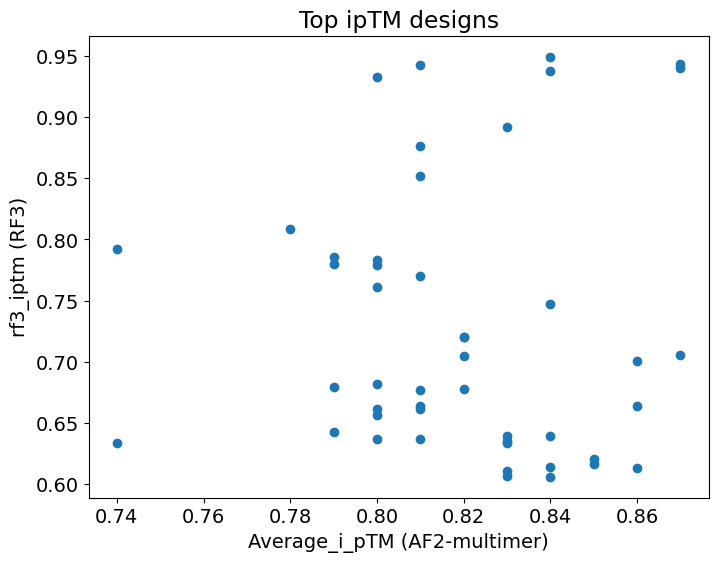

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('Average_i_pTM (AF2-multimer)')
plt.ylabel('rf3_iptm (RF3)')
plt.plot(top_iptm_designs['Average_i_pTM'], top_iptm_designs['rf3_iptm'], 'o')
plt.title('Top ipTM designs')

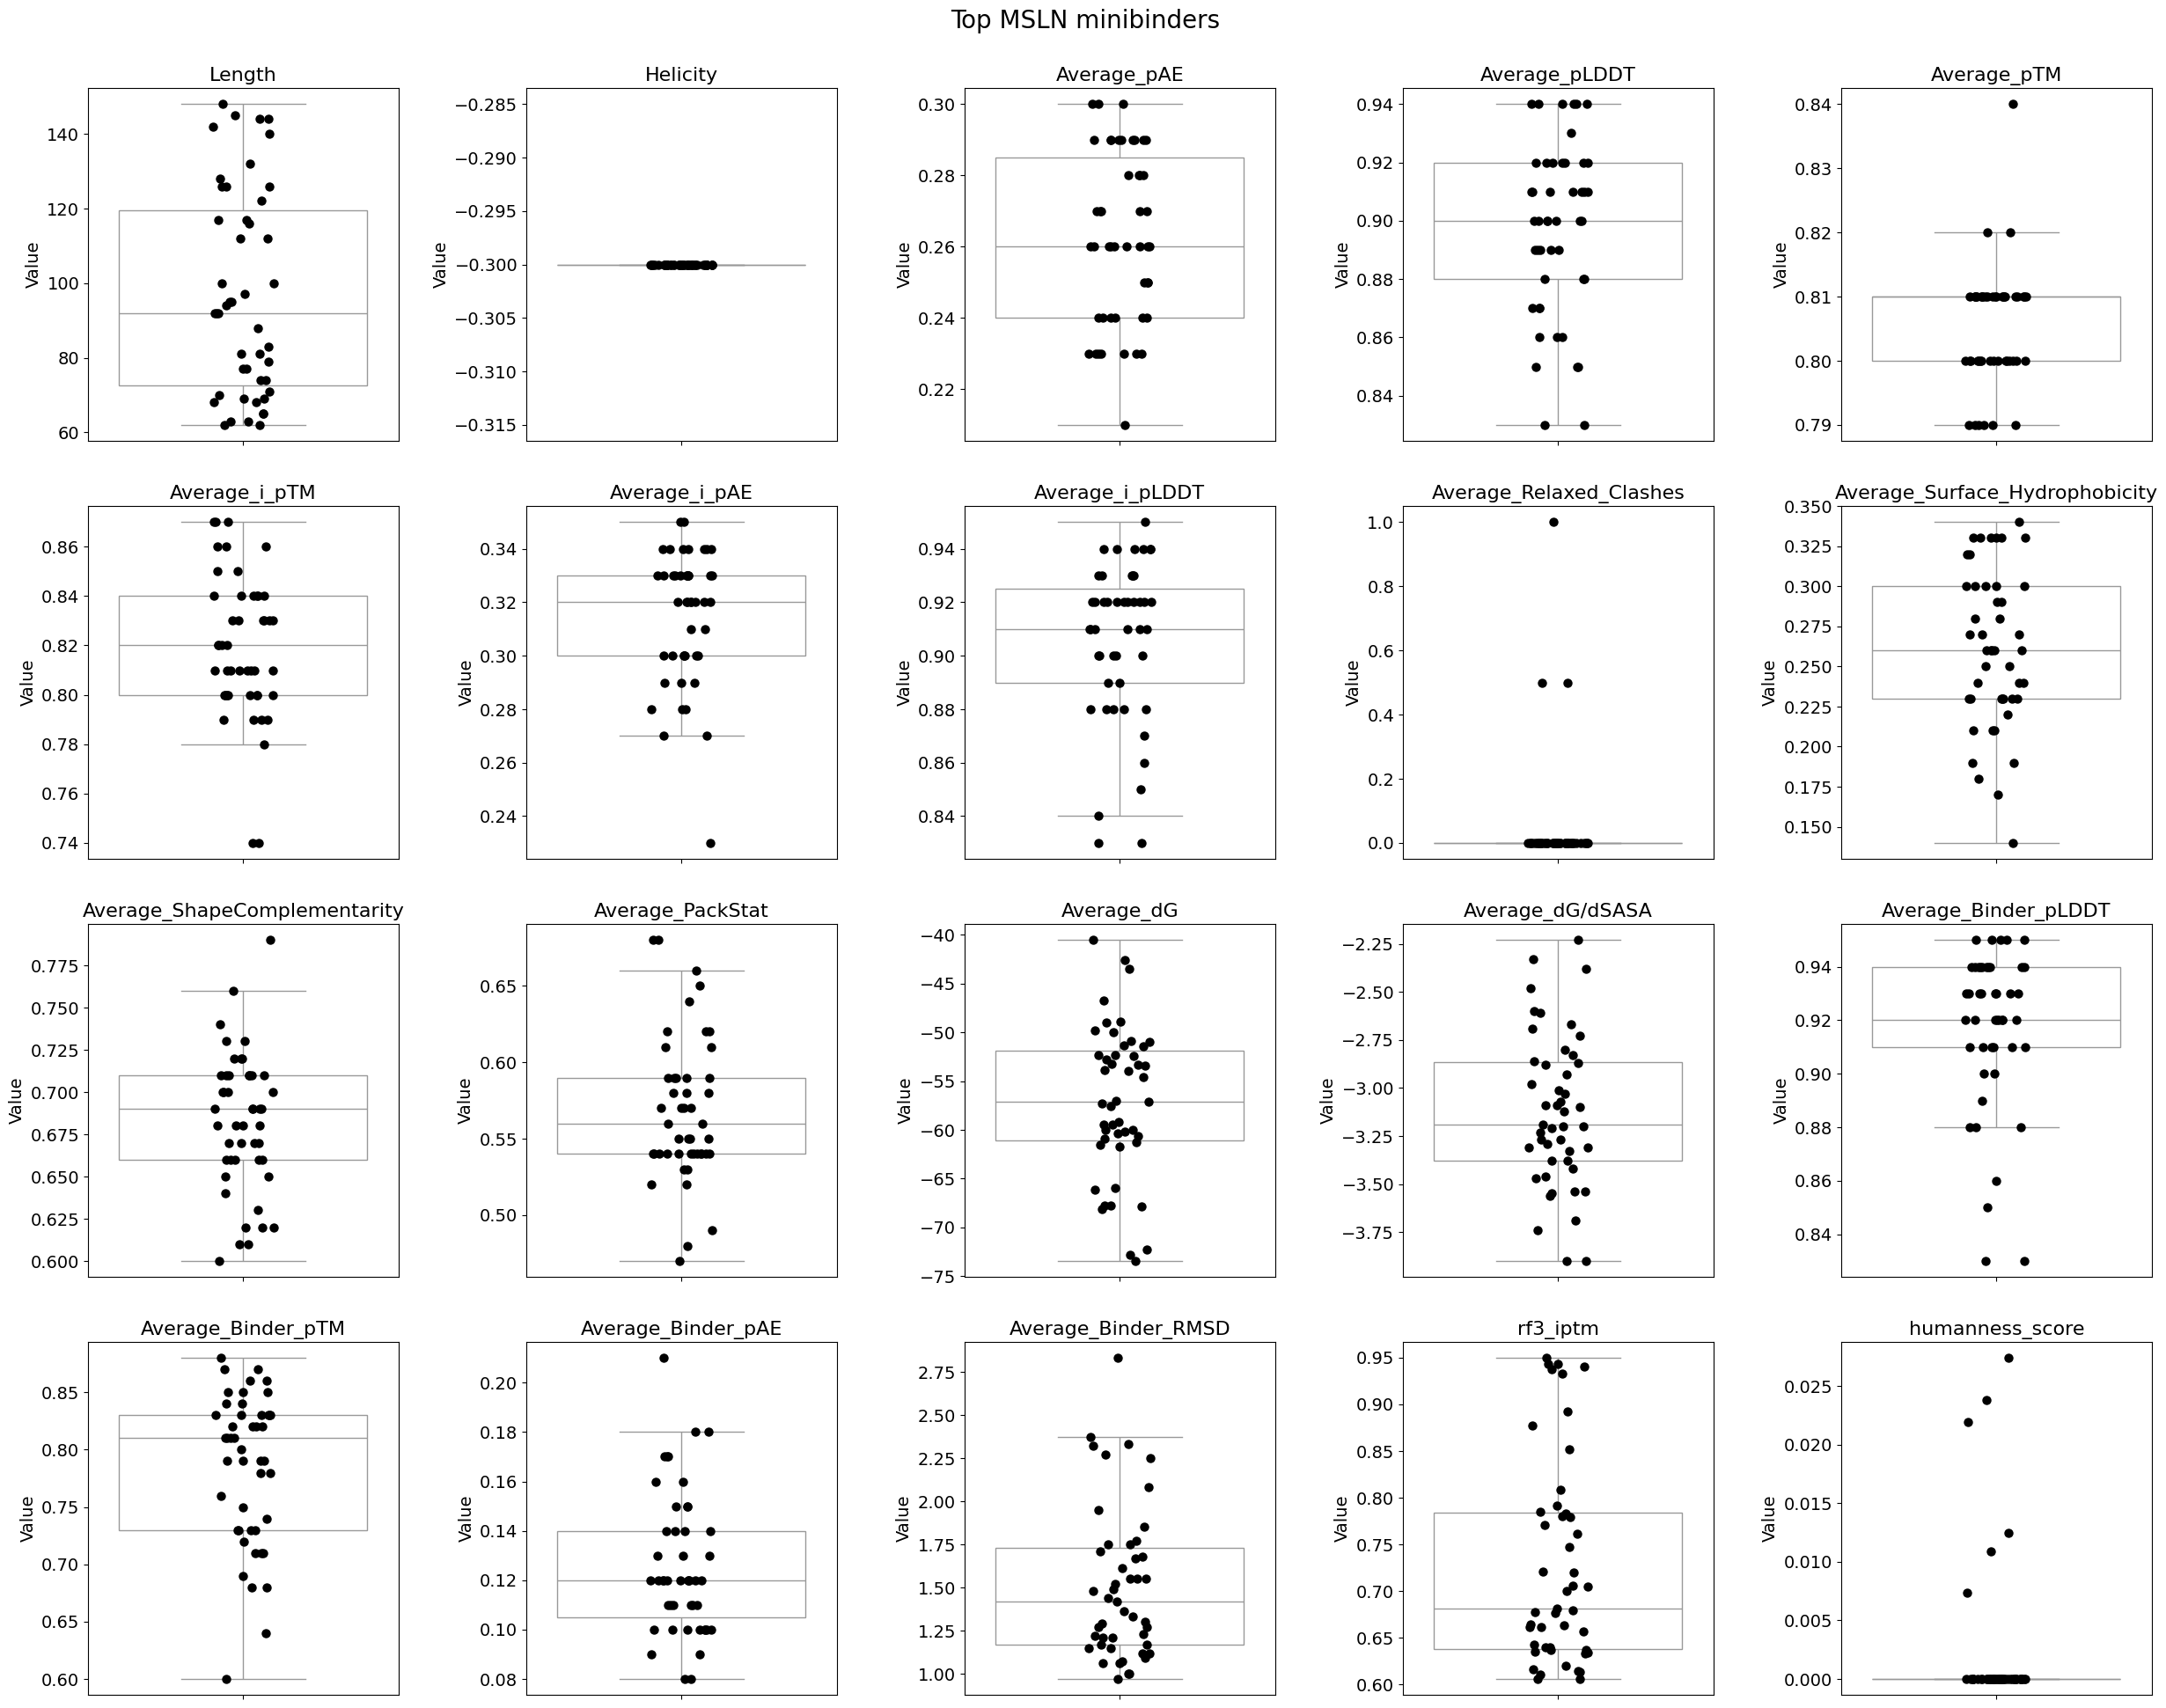

In [30]:
columns_to_plot = [
    'Length',
    'Helicity',
    'Average_pAE',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_i_pAE',
    'Average_i_pLDDT',
    'Average_Relaxed_Clashes',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dG/dSASA',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_pAE',
    'Average_Binder_RMSD',
    'rf3_iptm',
    'humanness_score'
]

top_iptm_designs_key_metrics = pd.read_csv('top_iptm_designs_key_metrics_minibinders.csv')

num_cols = 5
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a violin plot for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=top_iptm_designs_key_metrics[column], ax=axes[i], color='white', showfliers=False)
    sns.stripplot(y=top_iptm_designs_key_metrics[column], ax=axes[i], color='black', size=7.5, jitter=True, alpha=1)
    axes[i].set_title(column, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=14)

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent subplot titles from overlapping
fig.suptitle('Top MSLN minibinders', fontsize=20)
plt.tight_layout(pad=2)
plt.savefig('top_iptm_designs_key_metrics_boxplots_minibinders.png', dpi=300)

# Binder selection -- rough

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bindcraft = pd.read_csv('bindcraft_passed-bindcraft_metrics.csv')
rf3 = pd.read_csv('bindcraft_passed-rf3_metrics.csv')

In [3]:
bindcraft

,Rank,Design,Protocol,Length,Seed,Helicity,Target_Hotspot,Sequence,InterfaceResidues,MPNN_score,...,1_Binder_RMSD,2_Binder_RMSD,3_Binder_RMSD,4_Binder_RMSD,5_Binder_RMSD,DesignTime,Notes,TargetSettings,Filters,AdvancedSettings
0,NaN,8CX3_A_cleaned_l95_s607383_mpnn2,4stage,95,607383,-0.3,NaN,SAVEKIKERTNELANRVINTWNEIVEKKLSKEEAEKKLEEVIKEVK...,"B7,B10,B11,B14,B18,B19,B21,B22,B69,B70,B73,B74...",0.99,...,0.89,0.82,NaN,NaN,NaN,"0 hours, 5 minutes, 48 seconds",NaN,hotspots_1,default_filters,default_4stage_multimer
1,NaN,8CX3_A_cleaned_l95_s607383_mpnn5,4stage,95,607383,-0.3,NaN,DFVEEVKKKTNELANKVIDTWNEIVEKKLSKEEAEKKFEEVKEEVE...,"B7,B10,B11,B14,B18,B19,B21,B22,B70,B73,B74,B76...",1.01,...,1.01,0.94,NaN,NaN,NaN,"0 hours, 5 minutes, 27 seconds",NaN,hotspots_1,default_filters,default_4stage_multimer
2,NaN,8CX3_A_cleaned_l132_s379023_mpnn12,4stage,132,379023,-0.3,NaN,MYRTWEEKMEELLSKLDKNDLEKNKEILIEFLSEWVRETTHREDLA...,"B1,B2,B5,B6,B35,B39,B40,B41,B42,B45,B91,B92,B9...",0.90,...,1.10,1.23,NaN,NaN,NaN,"0 hours, 7 minutes, 31 seconds",NaN,hotspots_2,default_filters,default_4stage_multimer
3,NaN,8CX3_A_cleaned_l116_s33040_mpnn14,4stage,116,33040,-0.3,NaN,MEIPEEVVEFWRKGREAGAKGDRETMELYEMAAFLLFVAHLLKTKY...,"B23,B27,B30,B31,B34,B35,B73,B76,B77,B80,B81,B8...",0.92,...,1.29,1.18,NaN,NaN,NaN,"0 hours, 3 minutes, 43 seconds",NaN,hotspots_4,default_filters,hotspots10_4stage_multimer
4,NaN,8CX3_A_cleaned_l71_s491612_mpnn8,4stage,71,491612,-0.3,NaN,MKLSEKELRLKFAEMVLVAQNPKEDPEKVKEANEFVKNLSPEDWEL...,"B15,B16,B19,B20,B22,B23,B29,B32,B33,B36,B37,B4...",1.01,...,1.62,1.43,NaN,NaN,NaN,"0 hours, 3 minutes, 30 seconds",NaN,hotspots_4,default_filters,hotspots10_4stage_multimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,8CX3_A_cleaned_l62_s102225_mpnn4,4stage,62,102225,-0.3,"520,524,532,543",MSKEEQEKKVKEAMKKAMEAYHELEEYRRRHGDDPSDPEYAKLKEE...,"B3,B6,B7,B10,B11,B14,B15,B17,B18,B19,B21,B22,B...",1.00,...,1.25,1.59,NaN,NaN,NaN,"0 hours, 3 minutes, 2 seconds",NaN,hotspots_9,default_filters,hotspots10_4stage_multimer
118,NaN,8CX3_A_cleaned_l62_s102225_mpnn5,4stage,62,102225,-0.3,"520,524,532,543",MSKEEMEKEVKKLMKEAMEAYHELEEYRRRHGDDPSDPKYKELLER...,"B7,B10,B11,B14,B15,B17,B18,B19,B21,B22,B29,B51...",1.00,...,1.18,1.15,NaN,NaN,NaN,"0 hours, 2 minutes, 49 seconds",NaN,hotspots_9,default_filters,hotspots10_4stage_multimer
119,NaN,8CX3_A_cleaned_l88_s309438_mpnn1,4stage,88,309438,-0.3,"520,524,532,543",PKDESLPTEDELIELLMEMMQVTEPLTSTEEGKKLFVEVFEKFRKA...,"B9,B12,B13,B16,B17,B19,B20,B21,B23,B24,B27,B32...",0.99,...,1.98,1.92,NaN,NaN,NaN,"0 hours, 4 minutes, 21 seconds",NaN,hotspots_9,default_filters,hotspots10_4stage_multimer
120,NaN,8CX3_A_cleaned_l88_s309438_mpnn4,4stage,88,309438,-0.3,"520,524,532,543",GKDKSLPSEQELIDLLMEMMQVLEPLTSTEEGKELFVKVFEKFRKA...,"B9,B12,B13,B16,B17,B20,B21,B24,B27,B33,B36,B37...",1.08,...,1.53,1.67,NaN,NaN,NaN,"0 hours, 3 minutes, 28 seconds",NaN,hotspots_9,default_filters,hotspots10_4stage_multimer


In [30]:
rf3.rename(columns={'example_id': 'Design'}, inplace=True)
rf3['Design'] = rf3['Design'].str.rsplit('_',n=1).str[0]
rf3

,Design,ptm.ptm_0,ptm.ptm_1,ptm.ptm_2,ptm.ptm_3,ptm.ptm_4,iptm.iptm_0,iptm.iptm_1,iptm.iptm_2,iptm.iptm_3,...,iptm.iptm_ligand_ligand_0,iptm.iptm_ligand_ligand_1,iptm.iptm_ligand_ligand_2,iptm.iptm_ligand_ligand_3,iptm.iptm_ligand_ligand_4,count_clashing_chains.has_clash_0,count_clashing_chains.has_clash_1,count_clashing_chains.has_clash_2,count_clashing_chains.has_clash_3,count_clashing_chains.has_clash_4
0,8CX3_A_cleaned_l100_s894904_mpnn11,0.712009,0.721132,0.706804,0.721413,0.720973,0.857075,0.856816,0.845869,0.852770,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,8CX3_A_cleaned_l100_s894904_mpnn13,0.640994,0.635824,0.646204,0.646606,0.658525,0.705628,0.659023,0.621549,0.638660,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,8CX3_A_cleaned_l102_s482636_mpnn3,0.606127,0.587733,0.638170,0.659006,0.625639,0.512860,0.462629,0.624767,0.658392,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,8CX3_A_cleaned_l102_s482636_mpnn5,0.604718,0.608147,0.595187,0.639585,0.602596,0.552401,0.542533,0.563378,0.592044,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,8CX3_A_cleaned_l103_s24182_mpnn2,0.513239,0.596495,0.503360,0.597063,0.556702,0.345304,0.464837,0.369106,0.592780,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,8CX3_A_cleaned_l95_s607383_mpnn2,0.598017,0.603129,0.608758,0.596534,0.566768,0.563195,0.537009,0.580304,0.553152,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
118,8CX3_A_cleaned_l95_s607383_mpnn5,0.632283,0.667312,0.650892,0.653678,0.643621,0.602918,0.591628,0.637591,0.610376,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
119,8CX3_A_cleaned_l97_s694437_mpnn8,0.647892,0.616571,0.665273,0.648065,0.649421,0.671242,0.595234,0.720879,0.662579,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
120,8CX3_A_cleaned_l97_s850895_mpnn5,0.634693,0.664029,0.672557,0.613458,0.604920,0.557791,0.642447,0.595692,0.542554,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [46]:
df = pd.merge(bindcraft, rf3, on='Design', how='outer')
df['rf3_iptm'] = df[['iptm.iptm_0','iptm.iptm_1','iptm.iptm_2','iptm.iptm_3','iptm.iptm_4']].mean(axis=1)

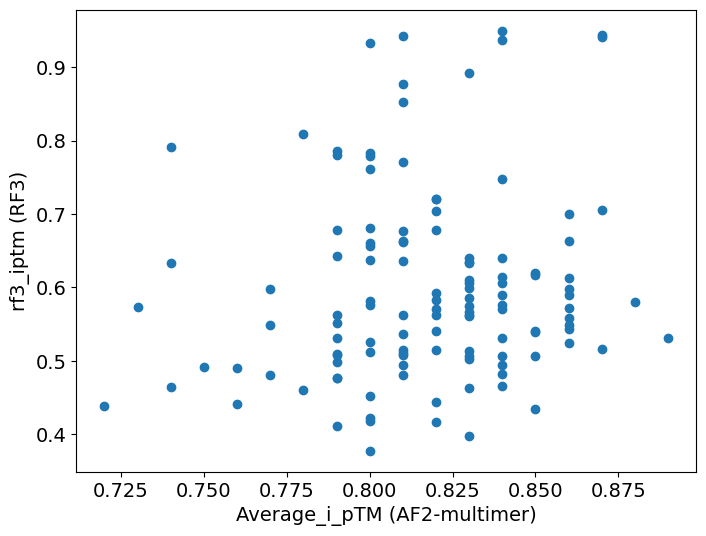

In [50]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('Average_i_pTM (AF2-multimer)')
plt.ylabel('rf3_iptm (RF3)')
plt.plot(df['Average_i_pTM'], df['rf3_iptm'], 'o')

In [54]:
top_iptm_designs = df[(df['Average_i_pTM'] > 0.7) & (df['rf3_iptm'] > 0.7)].sort_values(by=['rf3_iptm'], ascending=False)

Text(0.5, 1.0, 'Top ipTM designs')

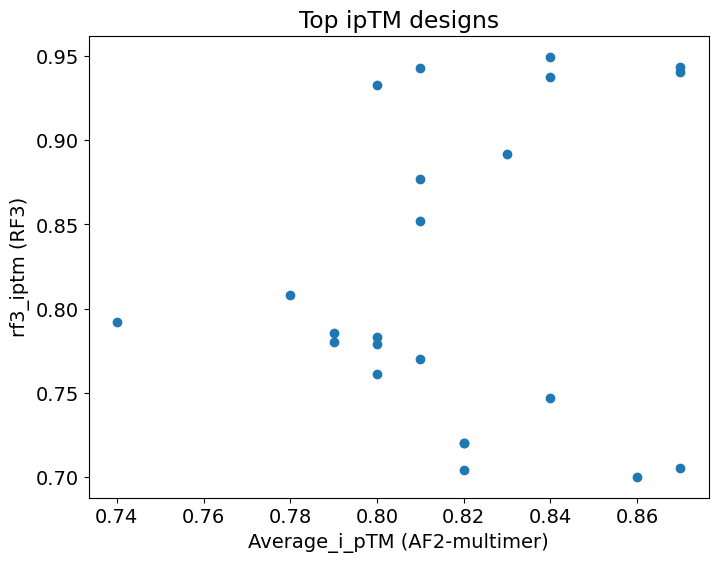

In [91]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('Average_i_pTM (AF2-multimer)')
plt.ylabel('rf3_iptm (RF3)')
plt.plot(top_iptm_designs['Average_i_pTM'], top_iptm_designs['rf3_iptm'], 'o')
plt.title('Top ipTM designs')

In [57]:
print(top_iptm_designs.columns.tolist())

['Rank', 'Design', 'Protocol', 'Length', 'Seed', 'Helicity', 'Target_Hotspot', 'Sequence', 'InterfaceResidues', 'MPNN_score', 'MPNN_seq_recovery', 'Average_pLDDT', '1_pLDDT', '2_pLDDT', '3_pLDDT', '4_pLDDT', '5_pLDDT', 'Average_pTM', '1_pTM', '2_pTM', '3_pTM', '4_pTM', '5_pTM', 'Average_i_pTM', '1_i_pTM', '2_i_pTM', '3_i_pTM', '4_i_pTM', '5_i_pTM', 'Average_pAE', '1_pAE', '2_pAE', '3_pAE', '4_pAE', '5_pAE', 'Average_i_pAE', '1_i_pAE', '2_i_pAE', '3_i_pAE', '4_i_pAE', '5_i_pAE', 'Average_i_pLDDT', '1_i_pLDDT', '2_i_pLDDT', '3_i_pLDDT', '4_i_pLDDT', '5_i_pLDDT', 'Average_ss_pLDDT', '1_ss_pLDDT', '2_ss_pLDDT', '3_ss_pLDDT', '4_ss_pLDDT', '5_ss_pLDDT', 'Average_Unrelaxed_Clashes', '1_Unrelaxed_Clashes', '2_Unrelaxed_Clashes', '3_Unrelaxed_Clashes', '4_Unrelaxed_Clashes', '5_Unrelaxed_Clashes', 'Average_Relaxed_Clashes', '1_Relaxed_Clashes', '2_Relaxed_Clashes', '3_Relaxed_Clashes', '4_Relaxed_Clashes', '5_Relaxed_Clashes', 'Average_Binder_Energy_Score', '1_Binder_Energy_Score', '2_Binder_E

In [ ]:
columns_to_plot = [
    'Length',
    'Helicity',
    'MPNN_score',
    'MPNN_seq_recovery',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_pAE',
    'Average_i_pLDDT',
    'Average_ss_pLDDT',
    'Average_Unrelaxed_Clashes',
    'Average_Relaxed_Clashes',
    'Average_Binder_Energy_Score',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dSASA',
    'Average_dG/dSASA',
    'Average_n_InterfaceResidues',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_pAE',
    'Average_Binder_RMSD',
    'rf3_iptm'
]

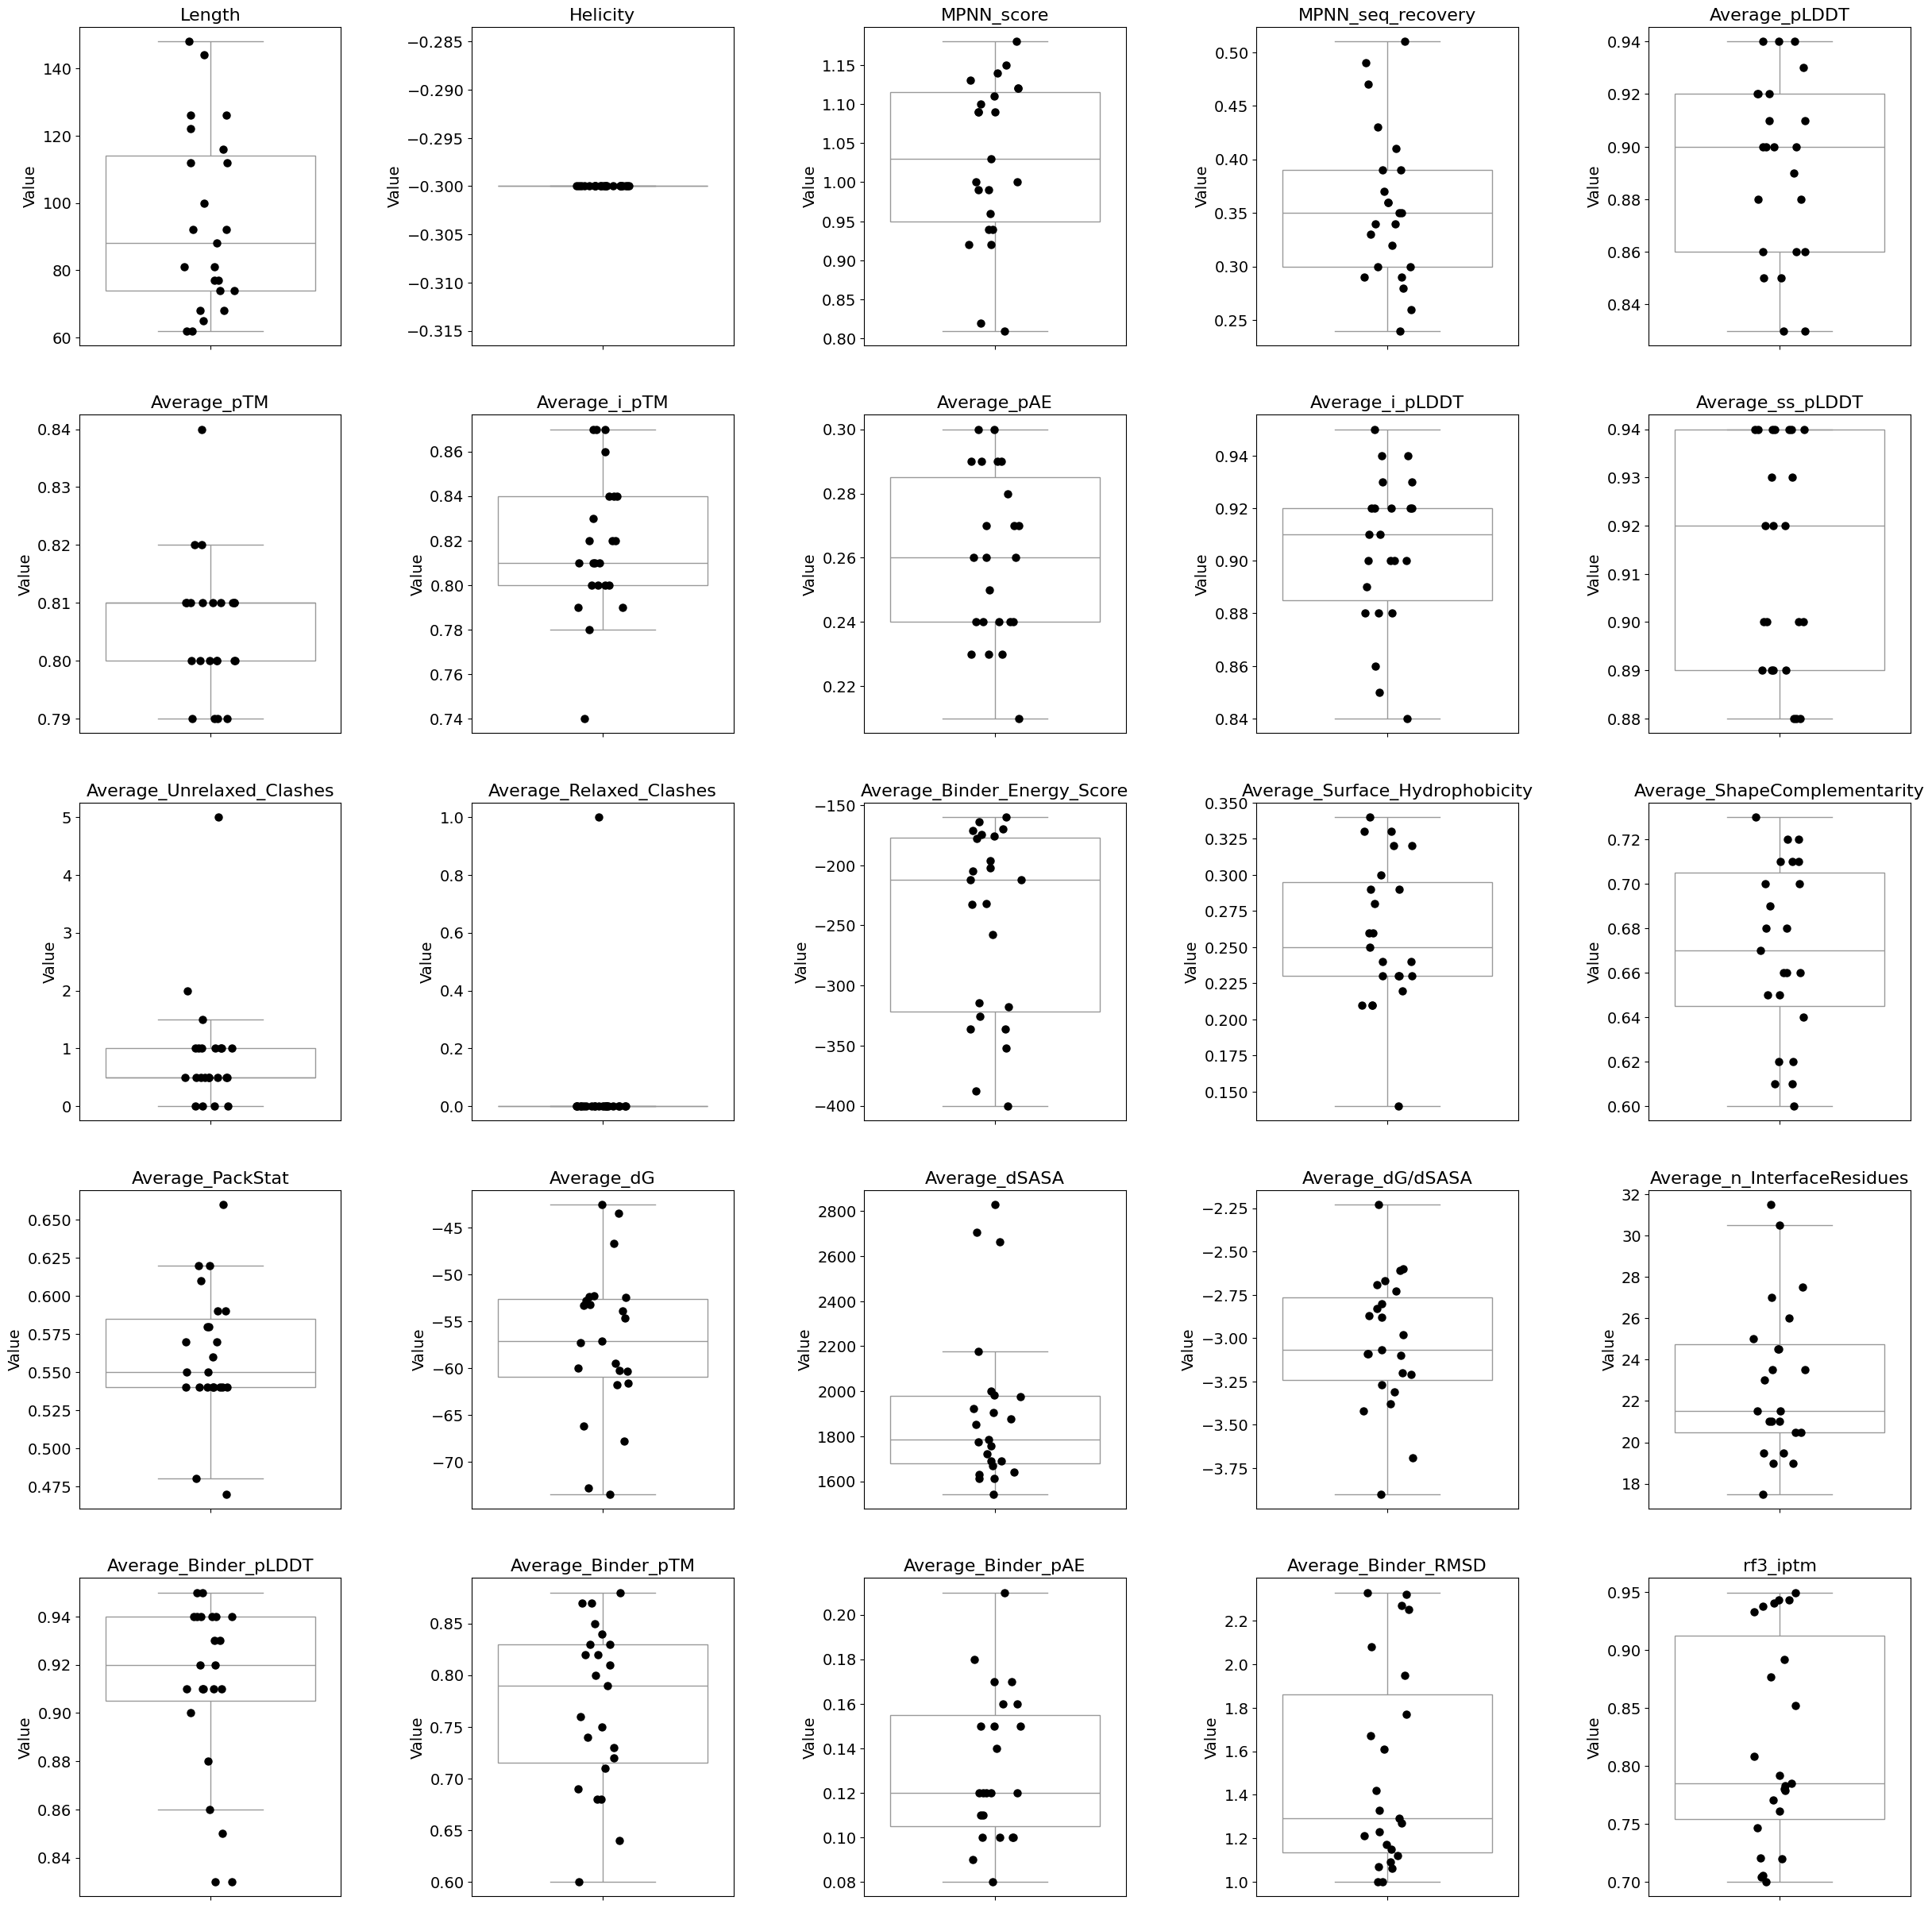

In [93]:
num_cols = 5
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a violin plot for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=top_iptm_designs[column], ax=axes[i], color='white', showfliers=False)
    sns.stripplot(y=top_iptm_designs[column], ax=axes[i], color='black', size=7.5, jitter=True, alpha=1)
    axes[i].set_title(column, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=14)

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent subplot titles from overlapping
plt.tight_layout(pad=3.0)

## Rough

In [73]:
top_iptm_designs['Average_Target_RMSD'].describe()

count    23.000000
mean      0.483043
std       0.082706
min       0.410000
25%       0.435000
50%       0.450000
75%       0.485000
max       0.710000
Name: Average_Target_RMSD, dtype: float64

In [60]:
top_iptm_designs['Length'].describe()

count     23.000000
mean      94.217391
std       26.471179
min       62.000000
25%       74.000000
50%       88.000000
75%      114.000000
max      148.000000
Name: Length, dtype: float64

In [62]:
top_iptm_designs['Sequence'].to_csv('top_iptm_designs_sequences.csv', index=False, header=True)

In [63]:
top_iptm_designs['Average_i_pTM'].describe()

count    23.000000
mean      0.818261
std       0.031716
min       0.740000
25%       0.800000
50%       0.810000
75%       0.840000
max       0.870000
Name: Average_i_pTM, dtype: float64

In [65]:
top_iptm_designs['rf3_iptm'].describe()

count    23.000000
mean      0.818468
std       0.089496
min       0.700269
25%       0.754018
50%       0.785306
75%       0.912416
max       0.949589
Name: rf3_iptm, dtype: float64

In [ ]:
top_iptm_designs['']

### Average metrics to plot

In [77]:
columns_to_plot = [
    'Length',
    'Helicity',
    'MPNN_score',
    'MPNN_seq_recovery',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_pAE',
    'Average_i_pLDDT',
    'Average_ss_pLDDT',
    'Average_Unrelaxed_Clashes',
    'Average_Relaxed_Clashes',
    'Average_Binder_Energy_Score',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dSASA',
    'Average_dG/dSASA',
    'Average_n_InterfaceResidues',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_pAE',
    'Average_Binder_RMSD',
    'rf3_iptm'
]

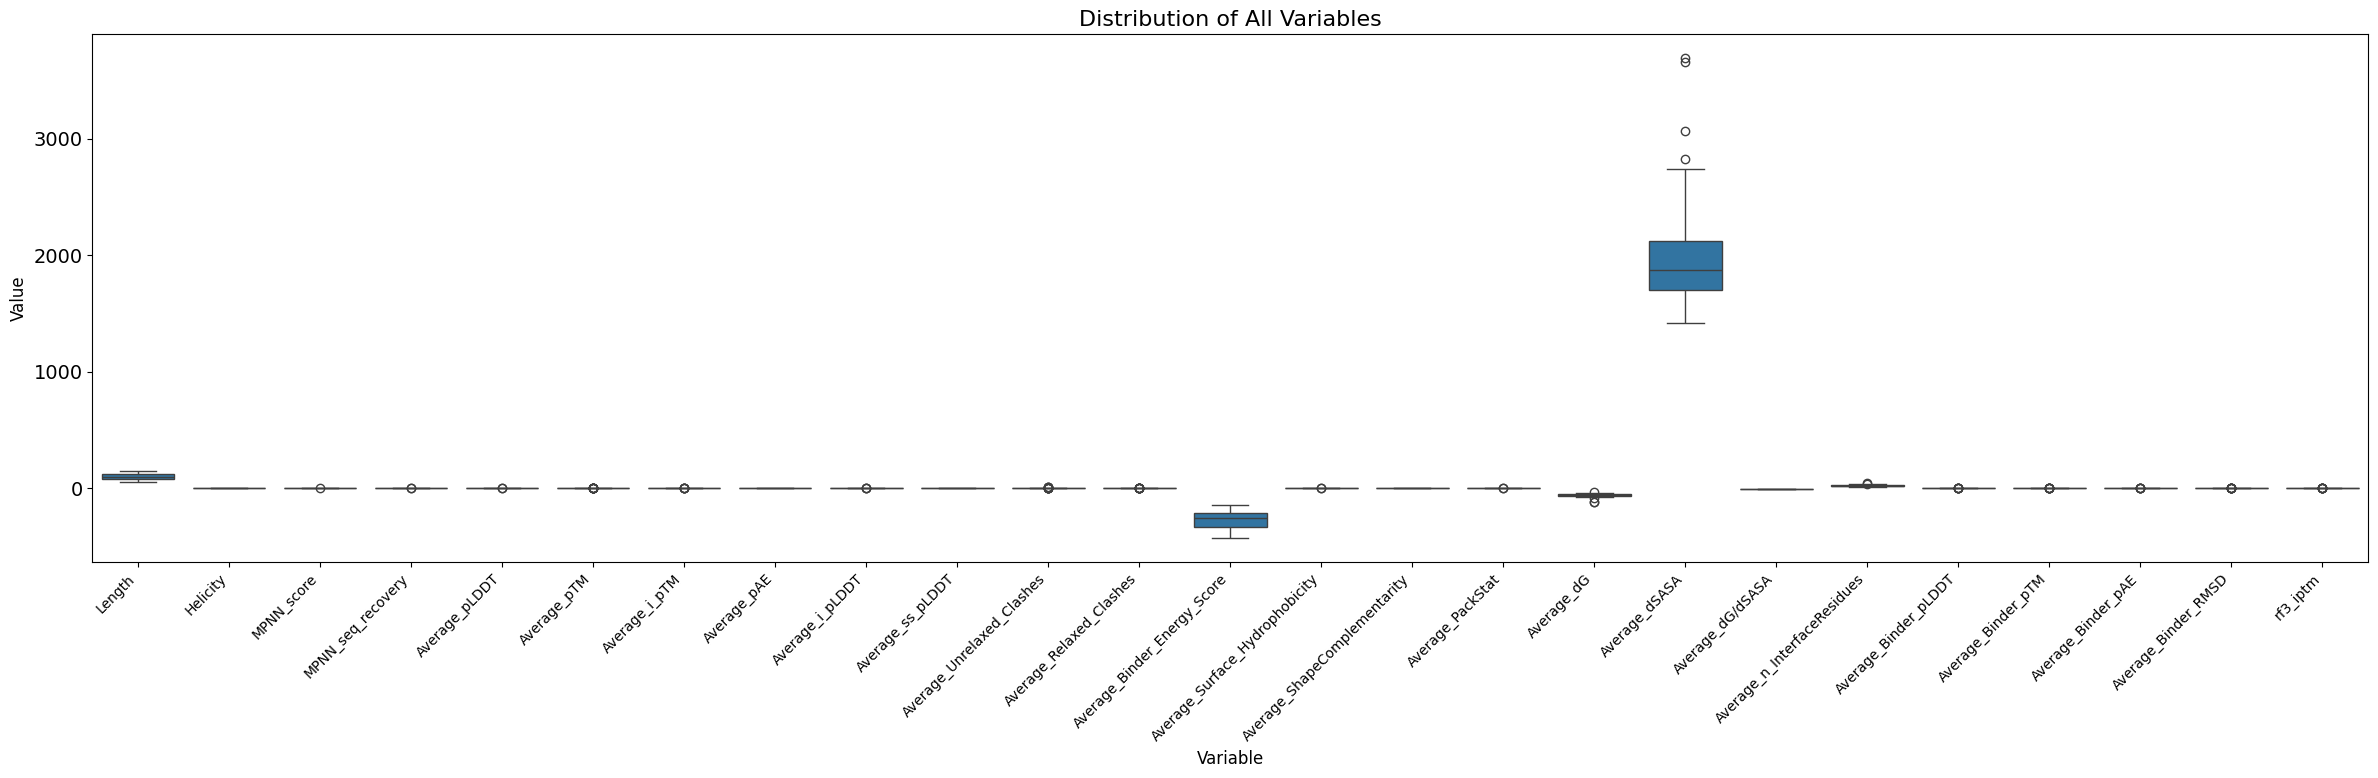

In [79]:
df_melted = df.melt(value_vars=columns_to_plot, var_name='Variable', value_name='Value')
plt.figure(figsize=(24, 8))

sns.boxplot(x='Variable', y='Value', data=df_melted)

# Set the title and labels
plt.title('Distribution of All Variables', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()

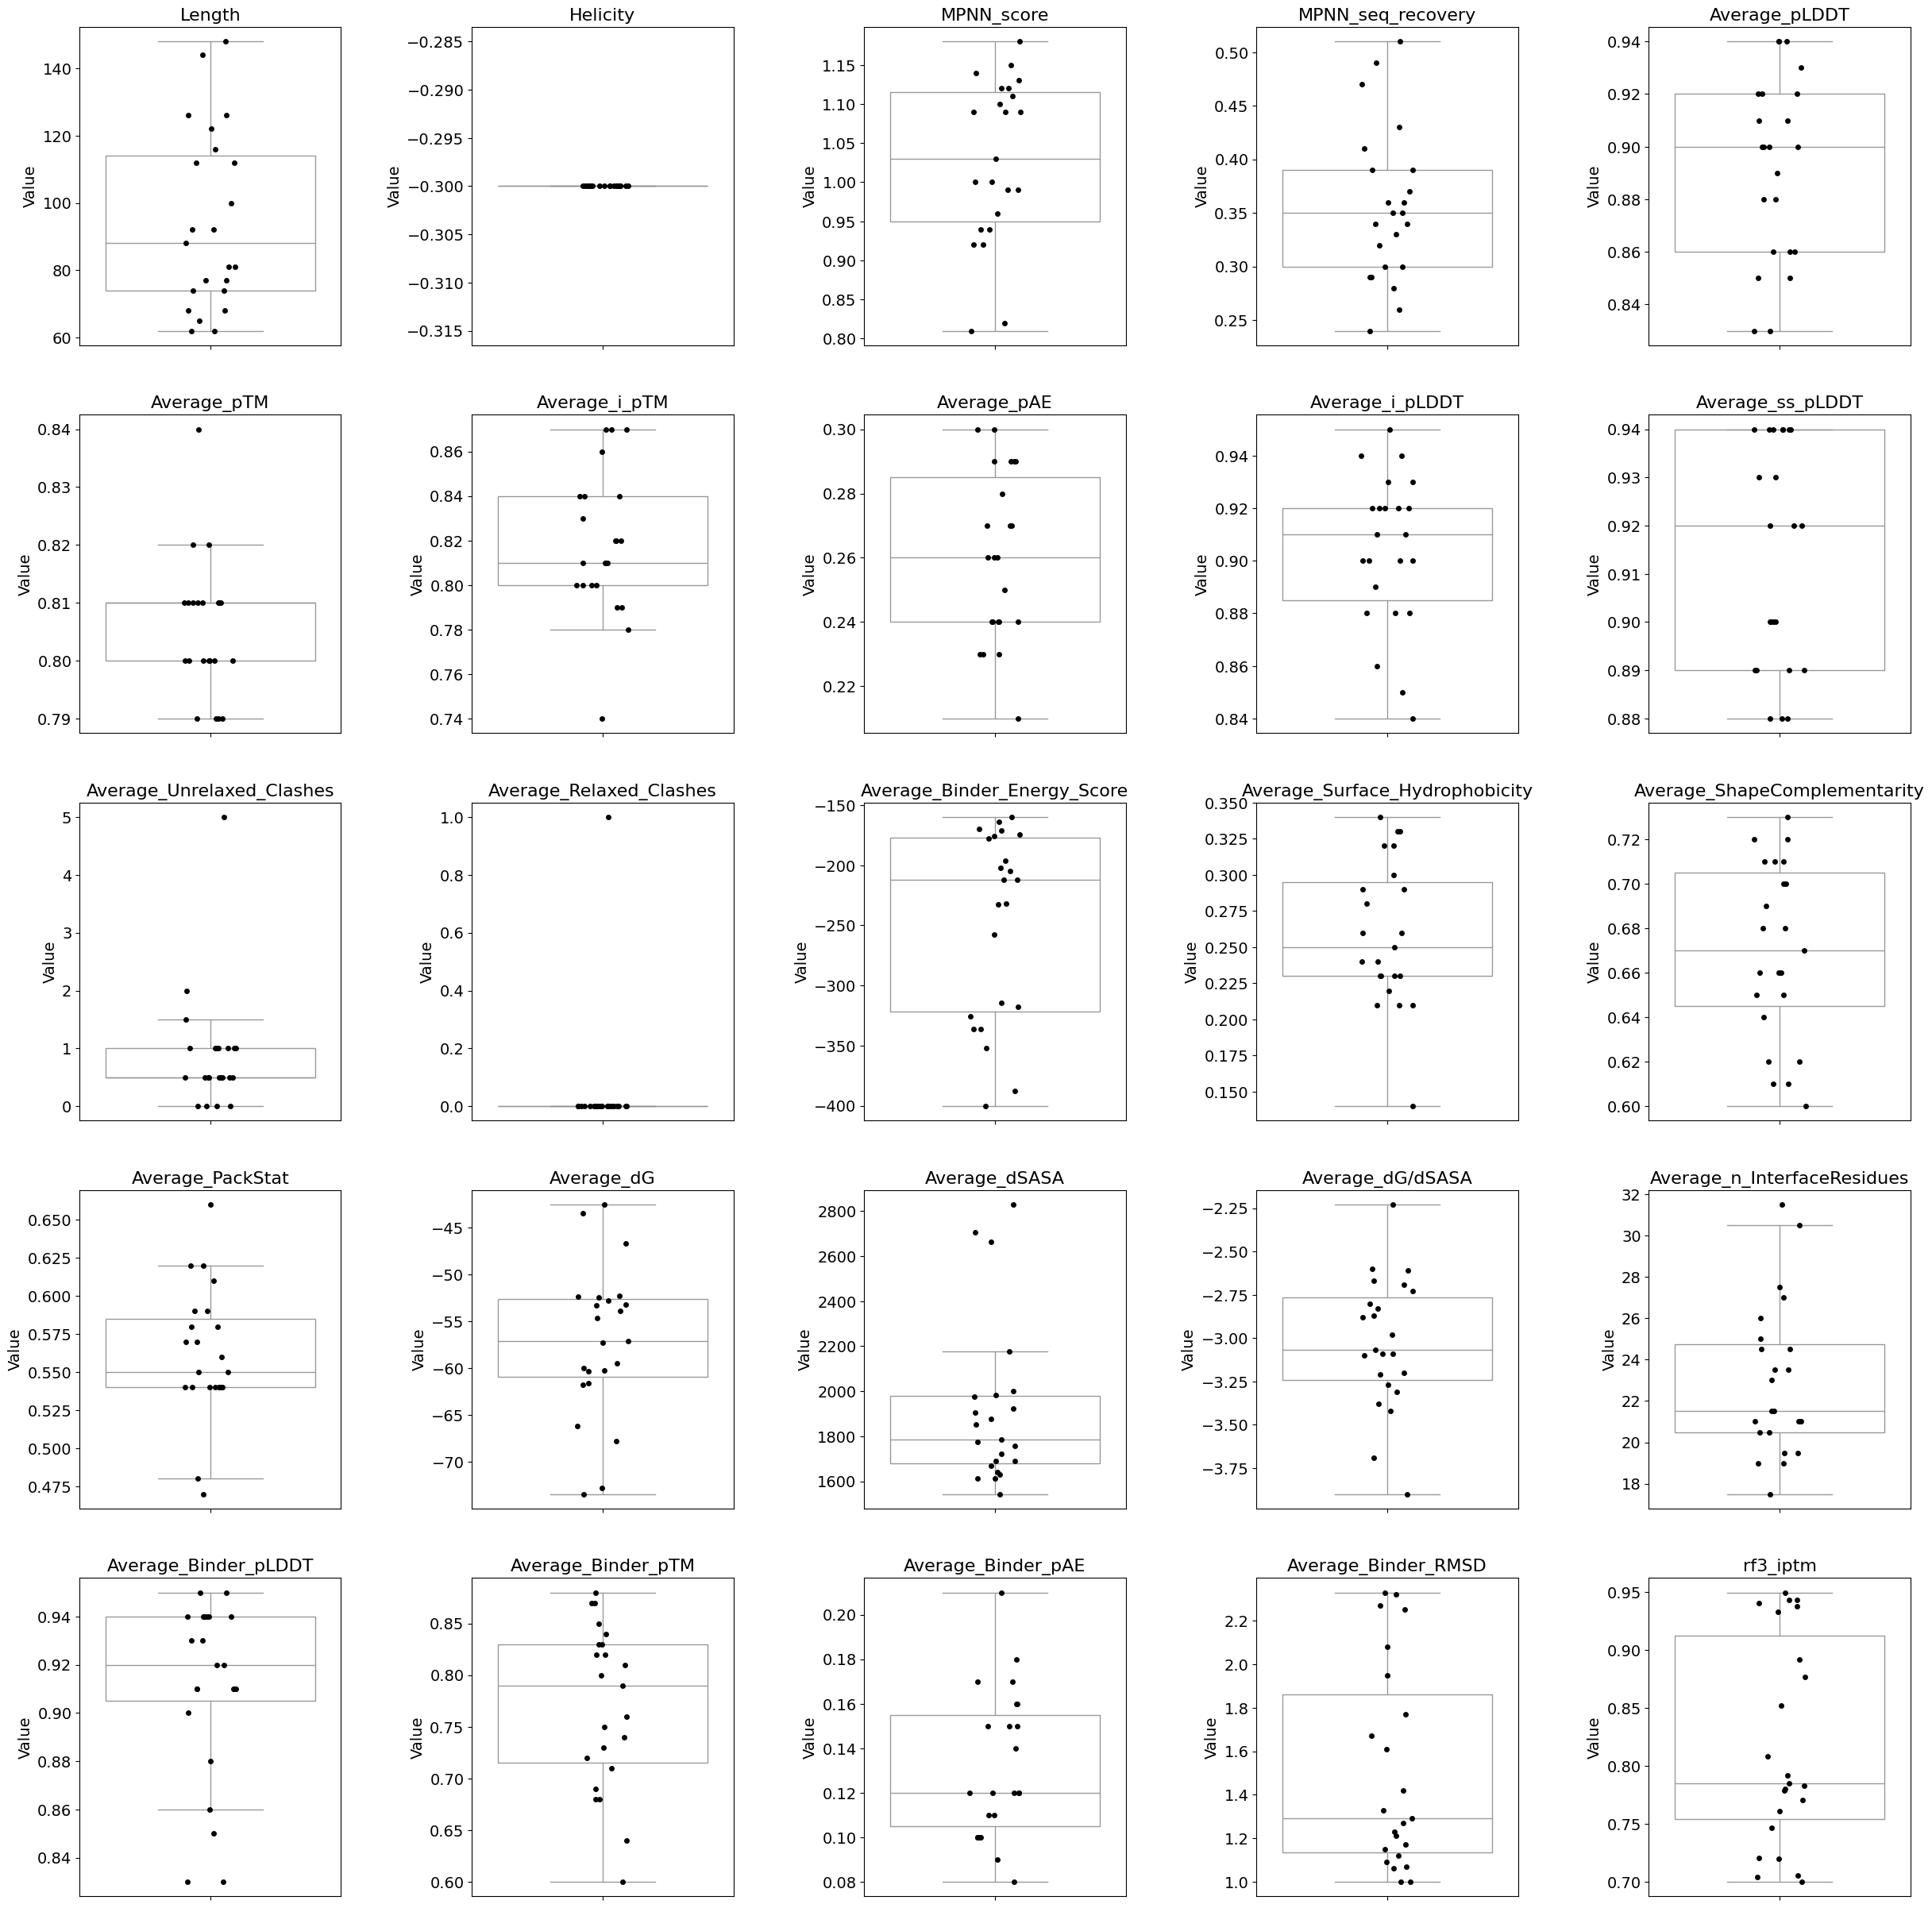

In [89]:
num_cols = 5
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a violin plot for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=top_iptm_designs[column], ax=axes[i], color='white', showfliers=False)
    sns.stripplot(y=top_iptm_designs[column], ax=axes[i], color='black', size=5, jitter=True, alpha=1)
    axes[i].set_title(column, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=14)

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent subplot titles from overlapping
plt.tight_layout(pad=3.0)

## Compute humanness

In [94]:
from promb import init_db

In [95]:
db = init_db('human-reference',9)


              *           █
▄▄▄▄    ▄▄▄  ▄█▄   ▄▄▄▄   █▄▄▄  
█   █  █    █▓███  █ █ █  █   █ 
█▄▄▄▀  █    ▀███▀  █   █  █▄▄▄▀ 
█                              
▀  protein mutation burden v1.0.2
                                
Loading promb database to memory...
Database (~11M peptides, <512 MB) loaded in 13s.


In [101]:
humanness_scores = []
for seq in top_iptm_designs['Sequence']:
    score = db.compute_average_mutations(seq)
    humanness_scores.append(score)

100%|██████████| 31/31 [00:07<00:00,  3.92it/s]


In [102]:
humanness_scores

[2.259259259259259,
 2.3076923076923075,
 2.1506849315068495,
 2.2211538461538463,
 2.260869565217391,
 2.1232876712328768,
 2.1481481481481484,
 2.1296296296296298,
 2.380434782608696,
 2.5606060606060606,
 2.484848484848485,
 2.2642857142857142,
 2.1,
 2.2711864406779663,
 2.2333333333333334,
 2.2023809523809526,
 2.2288135593220337,
 2.36231884057971,
 2.1544117647058822,
 2.3095238095238093,
 2.3508771929824563,
 2.0875,
 2.2017543859649122]

In [103]:
top_iptm_designs['humanness_score'] = humanness_scores

In [106]:
key_metrics = [
    'Length',
    'Helicity',
    'MPNN_score',
    'MPNN_seq_recovery',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_pAE',
    'Average_i_pLDDT',
    'Average_ss_pLDDT',
    'Average_Unrelaxed_Clashes',
    'Average_Relaxed_Clashes',
    'Average_Binder_Energy_Score',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dSASA',
    'Average_dG/dSASA',
    'Average_n_InterfaceResidues',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_pAE',
    'Average_Binder_RMSD',
    'rf3_iptm',
    'humanness_score',
    'Sequence'
]

In [107]:
top_iptm_designs_key_metrics = top_iptm_designs[key_metrics]

In [108]:
top_iptm_designs_key_metrics.to_csv('top_iptm_designs_key_metrics_minibinders.csv', index=False, header=True)

# Calculate RMSDs

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("top_iptm_designs_key_metrics_minibinders.csv")

In [3]:
df['Design'][0]

'8CX3_A_cleaned_l116_s33040_mpnn14'

In [8]:
from biotite.structure.io import load_structure

In [9]:
rf3 = load_structure("outputs/8CX3_A_cleaned_l116_s33040_mpnn14_model1_model_0.cif")

In [10]:
bc = load_structure("../out_hotspots_4/Accepted/8CX3_A_cleaned_l116_s33040_mpnn14_model1.pdb")

In [26]:
from biotite.structure import rmsd, superimpose
#from atomworks.constants import PROTEIN_BACKBONE_ATOM_NAMES

In [14]:
chA_rf3 = rf3[rf3.chain_id == "B"]
bb_chA_rf3 = chA_rf3[np.isin(chA_rf3.atom_name, ["N", "CA", "C"])]

In [15]:
chA_bc = bc[bc.chain_id == "B"]
bb_chA_bc = chA_bc[np.isin(chA_bc.atom_name, ["N", "CA", "C"])]

In [16]:
bb_refolded_fitted, _ = superimpose(bb_chA_bc, bb_chA_rf3)
rmsd_value = rmsd(bb_chA_bc, bb_refolded_fitted)

In [17]:
print(rmsd_value)

0.57445806


In [23]:
bb_bc = bc[np.isin(bc.atom_name,["N","CA","C","O"])]
bb_rf3 = rf3[np.isin(rf3.atom_name,["N","CA","C","O"])]

bb_bc_target = bb_bc[bb_bc.chain_id == "A"]
bb_rf3_target = bb_rf3[bb_rf3.chain_id == "A"]

bb_bc_binder= bb_bc[bb_bc.chain_id == "B"]
bb_rf3_binder = bb_rf3[bb_rf3.chain_id == "B"]

In [24]:
fitted_bb_target_rf3, transformation = superimpose(bb_bc_target, bb_rf3_target)

In [33]:
print(rmsd(bb_bc_target,fitted_bb_target_rf3))

8.868481


In [27]:
bb_rf3_binder_targetaligned = transformation.apply(bb_rf3_binder)

In [29]:
print(rmsd(bb_bc_binder, bb_rf3_binder_targetaligned))

21.21704


In [30]:
print(rmsd(bb_bc_binder,bb_rf3_binder))

171.94897


In [32]:
bb_rf3_binder_binderaligned, _ = superimpose(bb_bc_binder, bb_rf3_binder)
print(rmsd(bb_bc_binder,bb_rf3_binder_binderaligned))

0.5785


In [ ]:
p

In [16]:
from biotite.structure.io.pdb import PDBFile
pdb_file = PDBFile()
pdb_file.set_structure(rf3)
pdb_file.write("outputs/8CX3_A_cleaned_l116_s33040_mpnn14_model1_model_0.pdb")

## Calculate RMSDs using mdAnalysis

In [12]:
import biotite

In [3]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis.rms import RMSD

In [2]:
rf3 = mda.Universe("outputs/8CX3_A_cleaned_l116_s33040_mpnn14_model1_model_0.pdb","outputs/8CX3_A_cleaned_l116_s33040_mpnn14_model1_model_0.pdb")
bc = mda.Universe("../out_hotspots_4/Accepted/8CX3_A_cleaned_l116_s33040_mpnn14_model1.pdb")

In [9]:
rf3_B = rf3.select_atoms("chainID B and (name CA or name C or name N)")
bc_B = bc.select_atoms("chainID B and (name CA or name C or name N)")

In [10]:
RMSD(rf3_B,bc_B).run().rmsd[:,2]

/paperspace/apps/miniconda3/envs/py312/lib/python3.12/site-packages/MDAnalysis/analysis/base.py:542: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time
/paperspace/apps/miniconda3/envs/py312/lib/python3.12/site-packages/MDAnalysis/coordinates/base.py:757: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.time
/paperspace/apps/miniconda3/envs/py312/lib/python3.12/site-packages/MDAnalysis/analysis/rms.py:824: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


array([0.57443184])